# Exploratory Data analysis and Feature Selection
## Get the Data
In this section the data will be load as pandas dataframe, checks for data types will be conducted.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 195 observations of 23 variables. The name variable contains a sjubject id with session number. The status variable identifies whether a subject was diagnosed with parkinsons diseases at the recording time (stauts == 1).The other variables are numerical results of voice recordings. 

## Inspect and explore the Data
In this section the variables will be studied. The target attribute is the status variable, which indicates whether a subject is diagnosed with parkinson (1) or not (0). Correlations will be studied. Identify necessary transformations

In [4]:
#check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
# get 5 number summary of all numerical variables
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot:title={'center':'Distribution of Parkinson disease (1) versus Healthy (0)'}>

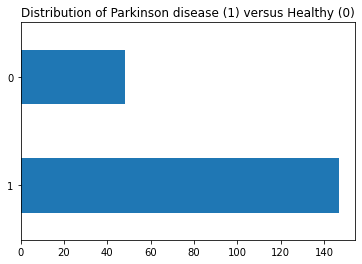

In [6]:
# observe the target variable
df.status.value_counts().plot(title = 'Distribution of Parkinson disease (1) versus Healthy (0)', 
                              kind='barh')

In [7]:
# distribution percentage
df.status.value_counts()/df.shape[0]

1    0.753846
0    0.246154
Name: status, dtype: float64

The outcome variable is very skewed towards the parkinson class. A model, which would always predict the bigger class (Parkinson disease) would be correct in about 75% of all cases. Most models are trained to increase accuracy and reduce errors, which make them overestimate the majority class and not capturing the minority class. When choosing models they need either be robust for imbalanced groups of a balancing of groups needs to be conducted prior.[https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/] Splitting the dataset into training and test set could result into nearby no data from the group 0 under unfortunate circumstances if balancing is not conducted.  

Explore the relationship of the features to make a selection (21 features are way too many dimensions). There are several blocks of similar feature measurements: several measures for the fundamental frequency

<AxesSubplot:>

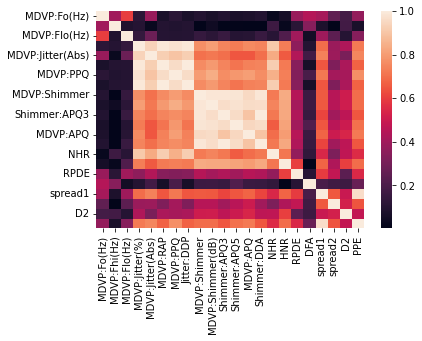

In [8]:
# initial correlation matrix
c = df.loc[ : , df.columns != 'status'].corr().abs()
sns.heatmap(c)

The fundamental frequency features seem to have no correlation to any other feature as well not among each other. There are clusters of correlation visible for the jitter realted features, Shimmer related features as well as for soread1 and PPE. The related groups are onserved in more detail in the following using pairplots [https://www.pluralsight.com/guides/finding-relationships-data-with-python].

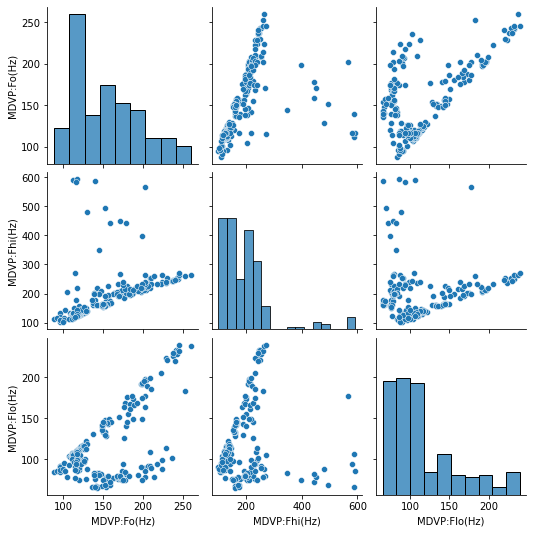

In [9]:
# measures of fundamental frequency
sns.pairplot(df.iloc[:, 1:4], kind="scatter")
plt.show()

The three fundamental frequency measures show common patterns, which makes sense, because they are containing partitions of the same information. However because of partitioning only some parts of the data points follow the shared pattern. The minimal fundamental frequency (Flo) is skewed to the left. The maximal fundamental frequency scatters around 200 Hertz and has some outliers up to 600 Hertz. The average vocal frequency is more balanced in its distribution with a strong tendency to 120 Hz, which is for males fairly common range. [https://en.wikipedia.org/wiki/Voice_frequency]

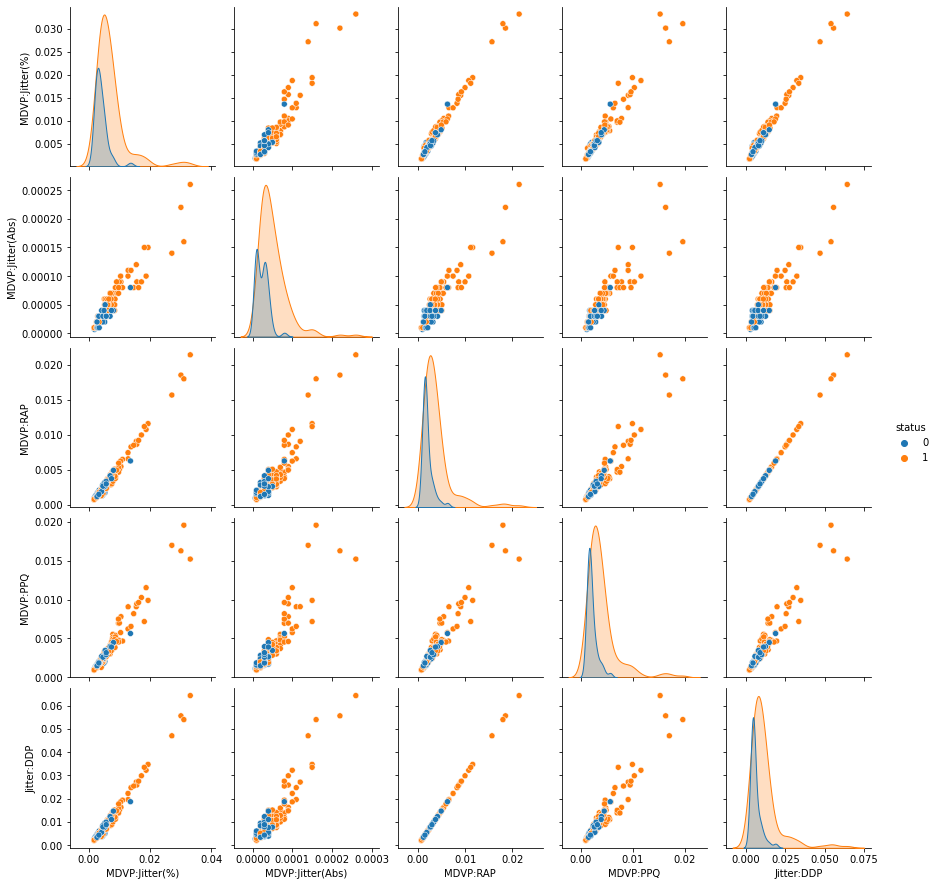

In [19]:
# measures of variation in fundamental frequency
sns.pairplot(df,hue = 'status', vars = df.iloc[:, 4:9], kind="scatter")
plt.show()

Linear correlation between all of the features in this category. Based on the heatmap the absolute jitter is the least correlated, this is why I will select this feature and discard the other features. the jitter is skewed towards very small values which makes sense because this is what characterizes jitter.

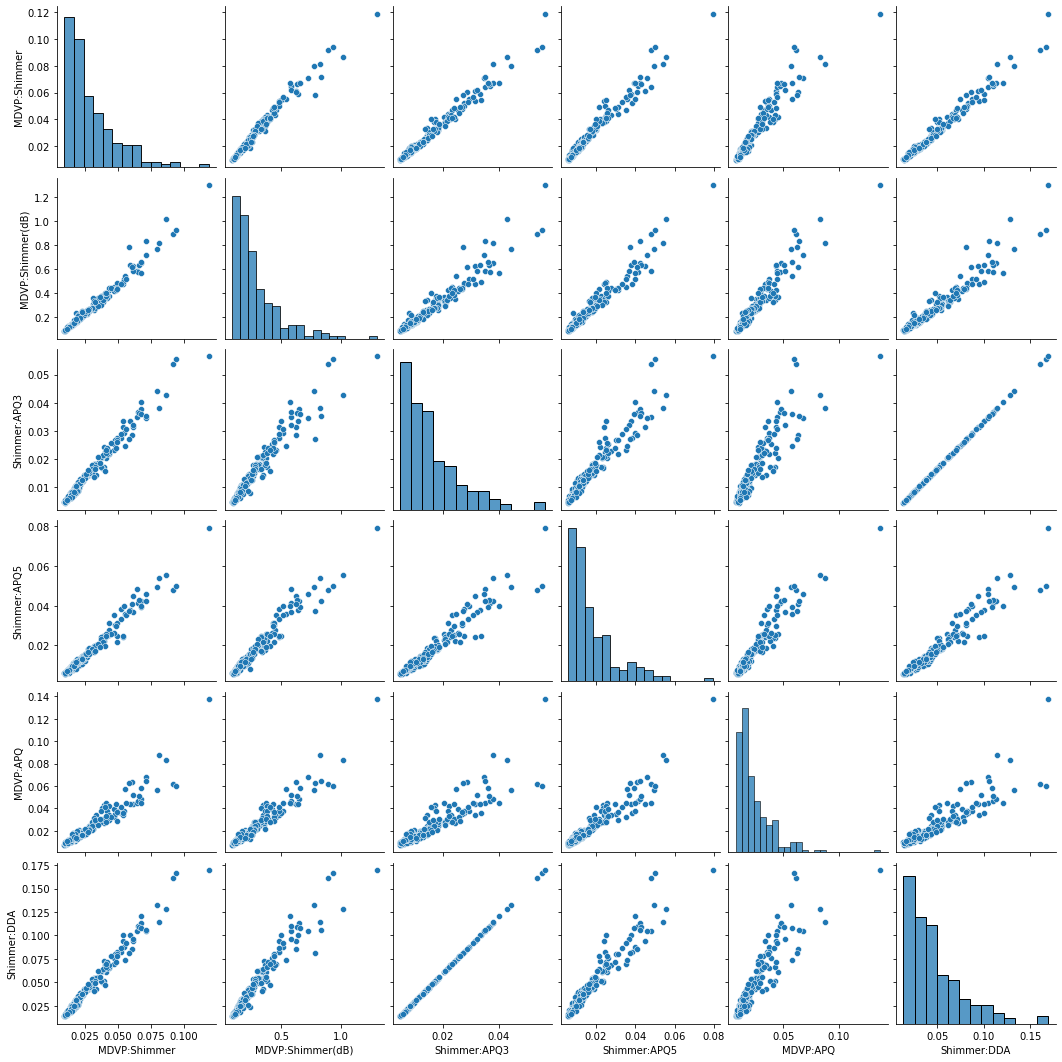

In [11]:
# Shimmer related features
sns.pairplot(df.iloc[:, 9:15], kind="scatter")
plt.show()

Linear relationship is seen for all of the shimmer related features. The data distribution looks quite similar as well. Similar as for the jittering, the Shimmer APQ is selected due to being the feature with the smallest correlation compared to the others.

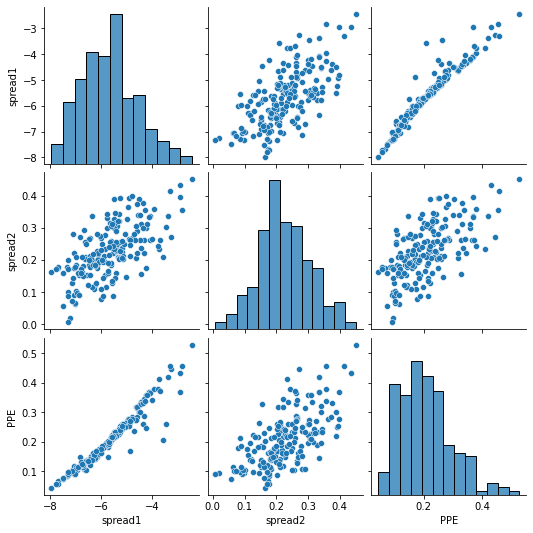

In [12]:
df_rem = df[['spread1', 'spread2', 'PPE']]
sns.pairplot(df_rem, kind="scatter")
plt.show()

NHR and HNR are similar measures. Since HNR is less correlated it is selected. RPDE and D2 are both not correlated and are therefore both selected. The two features are linearly realted as well. Spread1, spread2 and PPE form a category, spread2 is selected because of the lower correlation and less skewed distribution.

<AxesSubplot:>

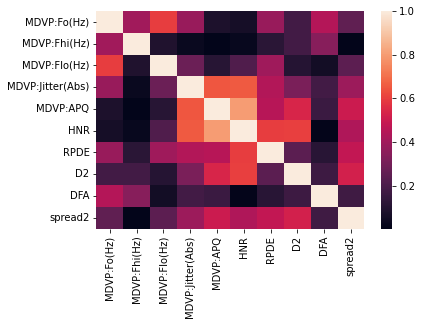

In [13]:
# leaner correlation matrix after selecting only a few features
df_selection = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:APQ', 'HNR', 'RPDE', 'D2', 'DFA', 'spread2']]
c = df_selection.corr().abs()
sns.heatmap(c)

The shimmer and HNR are still quite correlated. The shimmer describes the amplitude variations, the HNR measures the ration of noise to tonal components in the voice. Based on the described characteristics [https://www.gbmc.org/workfiles/mjdance/voice/grand-rounds/parkinson-disease.pdf] of dysphonia in Parkinsons diseases, it makes to me more sense to keep in the ratio of noise to tonal components. The amplitude could vary for several reasons (such as vibrato), but the noise amount might be quite higher for Parkinson disease related dysphonia compared to healthy subjects.

<AxesSubplot:>

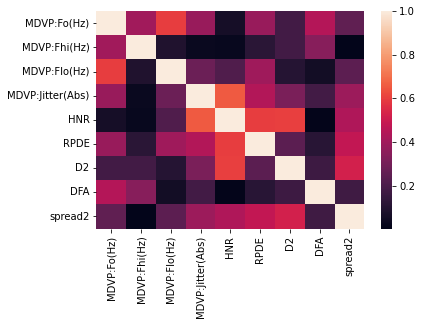

In [14]:
df_selection = df_selection.loc[:, df_selection.columns != 'MDVP:APQ']
c = df_selection.corr().abs()
sns.heatmap(c)

## Write dataset with selected features to file

In [17]:
df_selection['status'] = df.status
df_selection.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),HNR,RPDE,D2,DFA,spread2,status
0,119.992,157.302,74.997,0.00007,21.033,0.414783,2.301442,0.815285,0.266482,1
1,122.400,148.650,113.819,0.00008,19.085,0.458359,2.486855,0.819521,0.335590,1
2,116.682,131.111,111.555,0.00009,20.651,0.429895,2.342259,0.825288,0.311173,1
3,116.676,137.871,111.366,0.00009,20.644,0.434969,2.405554,0.819235,0.334147,1
4,116.014,141.781,110.655,0.00011,19.649,0.417356,2.332180,0.823484,0.234513,1


In [18]:
df_selection.to_csv('parkinson_feature_selection.csv')